In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the train  dataset
df1 = pd.read_csv("loan_data_train.csv")
df1.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [3]:
df1.shape

(2200, 15)

In [4]:
# Importing the test dataset
df2 = pd.read_csv("loan_data_test.csv")
df2.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


In [5]:
# adding a dummy column in df2 name 'Interest.Rate'
df2['Interest.Rate'] = 'testdata'

In [6]:
df2.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Interest.Rate
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year,testdata
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years,testdata
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years,testdata
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years,testdata
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years,testdata


In [7]:
df2.shape

(300, 15)

In [8]:
# concanatig both train and test dataframe
df = pd.concat((df1, df2))

In [9]:
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [10]:
df.shape

(2500, 15)

# Exploratory Data Analysis
Replace the (.) with ( _ ) in column names

In [11]:
df.columns = df.columns.str.replace('.','_')

In [12]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount_Requested                2499 non-null   object 
 2   Amount_Funded_By_Investors      2499 non-null   object 
 3   Interest_Rate                   2500 non-null   object 
 4   Loan_Length                     2499 non-null   object 
 5   Loan_Purpose                    2499 non-null   object 
 6   Debt_To_Income_Ratio            2499 non-null   object 
 7   State                           2499 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2497 non-null   float64
 10  FICO_Range                      2500 non-null   object 
 11  Open_CREDIT_Lines               2496 non-null   object 
 12  Revolving_CREDIT_Balance        249

In [14]:
df.isnull().sum()

ID                                 1
Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      0
Loan_Length                        1
Loan_Purpose                       1
Debt_To_Income_Ratio               1
State                              1
Home_Ownership                     1
Monthly_Income                     3
FICO_Range                         0
Open_CREDIT_Lines                  4
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 78
dtype: int64

In [15]:
df.dtypes

ID                                float64
Amount_Requested                   object
Amount_Funded_By_Investors         object
Interest_Rate                      object
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [16]:
#df.Amount_Requested.astype(float)

In [17]:
df.loc[df.Amount_Requested == '.','Amount_Requested']=np.nan

In [18]:
df.Amount_Requested = df.Amount_Requested.astype(float)

In [19]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors         object
Interest_Rate                      object
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [20]:
#df.Amount_Funded_By_Investors.astype(float)

In [21]:
df.loc[df.Amount_Funded_By_Investors=='.']

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
110,16667.0,3000.0,.,17.44%,36 months,other,15.79%,MD,RENT,7952.0,660-664,4,12578,0.0,8 years
1091,3660.0,1000.0,.,13.16%,36 months,other,19.63%,MI,RENT,3500.0,670-674,9,11189,2.0,2 years
1983,4227.0,3000.0,.,8.59%,36 months,other,3.72%,MA,MORTGAGE,4167.0,765-769,4,7074,0.0,5 years
5,33777.0,6000.0,.,testdata,36 months,home_improvement,2.52%,NJ,MORTGAGE,4800.0,750-754,.,1442,0.0,10+ years


In [22]:
df.loc[df.Amount_Funded_By_Investors=='.','Amount_Funded_By_Investors']=np.nan

In [23]:
df.Amount_Funded_By_Investors = df.Amount_Funded_By_Investors.astype(float)

In [24]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [25]:
# Interest_Rate
df.Interest_Rate

0        18.49%
1        17.27%
2        14.33%
3        16.29%
4        12.23%
         ...   
295    testdata
296    testdata
297    testdata
298    testdata
299    testdata
Name: Interest_Rate, Length: 2500, dtype: object

In [26]:
df.Interest_Rate.replace('%','',regex=True, inplace=True)

In [27]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750.0,19750.00,17.27,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100.0,2100.00,14.33,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000.0,28000.00,16.29,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250.0,17431.82,12.23,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [28]:
# Loan Length
import re


In [29]:
df.Loan_Length.replace(r'[a-zA-Z]','',regex=True, inplace=True)

In [30]:
df.head(2)

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.0,18.49,60,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750.0,19750.0,17.27,60,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years


In [31]:
df.loc[df.Loan_Length=='.','Loan_Length']=np.nan

In [32]:
df.Loan_Length = df.Loan_Length.astype(float)

In [33]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [34]:
# Debt_To_Income_Ratio
df.Debt_To_Income_Ratio = df.Debt_To_Income_Ratio.replace('%','',regex=True)

In [35]:
df.Debt_To_Income_Ratio = df.Debt_To_Income_Ratio.astype(float)

In [36]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [37]:
# FICO_Range
df.FICO_Range

0      720-724
1      710-714
2      690-694
3      710-714
4      730-734
        ...   
295    705-709
296    705-709
297    670-674
298    675-679
299    675-679
Name: FICO_Range, Length: 2500, dtype: object

In [38]:
df.FICO_Range = df.FICO_Range.apply(lambda x:x.split('-'))
df.FICO_Range

0      [720, 724]
1      [710, 714]
2      [690, 694]
3      [710, 714]
4      [730, 734]
          ...    
295    [705, 709]
296    [705, 709]
297    [670, 674]
298    [675, 679]
299    [675, 679]
Name: FICO_Range, Length: 2500, dtype: object

In [39]:
df['FICO_Range'] = df.FICO_Range.apply(lambda x: (int(x[0]) + int(x[1])) / 2)


In [40]:
df.FICO_Range

0      722.0
1      712.0
2      692.0
3      712.0
4      732.0
       ...  
295    707.0
296    707.0
297    672.0
298    677.0
299    677.0
Name: FICO_Range, Length: 2500, dtype: float64

In [41]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,722.0,11,15210,3.0,5 years
1,75473.0,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,712.0,14,19070,3.0,4 years
2,67265.0,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,692.0,13,893,1.0,< 1 year
3,80167.0,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,712.0,12,38194,1.0,10+ years
4,17240.0,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,732.0,6,31061,2.0,10+ years


In [42]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [43]:
# Open_CREDIT_Lines
df.Open_CREDIT_Lines

0      11
1      14
2      13
3      12
4       6
       ..
295     7
296    10
297     9
298    13
299     8
Name: Open_CREDIT_Lines, Length: 2500, dtype: object

In [44]:
df.loc[df.Open_CREDIT_Lines=='.', 'Open_CREDIT_Lines'] = np.nan

In [45]:
df.Open_CREDIT_Lines = df.Open_CREDIT_Lines.astype(float)

In [46]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [47]:
# Revolving_CREDIT_Balance
df.loc[df.Revolving_CREDIT_Balance == '.', 'Revolving_CREDIT_Balance'] =np.nan

In [48]:
df.Revolving_CREDIT_Balance = df.Revolving_CREDIT_Balance.astype(float)

In [49]:
# Employment_Length
df.Employment_Length.value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment_Length, dtype: int64

In [50]:
df.Employment_Length = df.Employment_Length.replace(r'[a-z +]','', regex=True)

df.Employment_Length.value_counts

<bound method IndexOpsMixin.value_counts of 0       5
1       4
2      <1
3      10
4      10
       ..
295     7
296    10
297     6
298    10
299     2
Name: Employment_Length, Length: 2500, dtype: object>

In [51]:
df.loc[df.Employment_Length== '<1', 'Employment_Length']=0.5

In [52]:
df.Employment_Length

0        5
1        4
2      0.5
3       10
4       10
      ... 
295      7
296     10
297      6
298     10
299      2
Name: Employment_Length, Length: 2500, dtype: object

In [53]:
df.loc[df.Employment_Length == '.','Employment_Length'] = np.nan

In [54]:
df.Employment_Length = df.Employment_Length.astype(float)

In [55]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                 float64
dtype: object

In [56]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,722.0,11.0,15210.0,3.0,5.0
1,75473.0,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,712.0,14.0,19070.0,3.0,4.0
2,67265.0,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,692.0,13.0,893.0,1.0,0.5
3,80167.0,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,712.0,12.0,38194.0,1.0,10.0
4,17240.0,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,732.0,6.0,31061.0,2.0,10.0


# Missing Values

In [57]:
df.isna().sum()

ID                                 1
Amount_Requested                   5
Amount_Funded_By_Investors         5
Interest_Rate                      0
Loan_Length                        2
Loan_Purpose                       1
Debt_To_Income_Ratio               1
State                              1
Home_Ownership                     1
Monthly_Income                     3
FICO_Range                         0
Open_CREDIT_Lines                  9
Revolving_CREDIT_Balance           5
Inquiries_in_the_Last_6_Months     3
Employment_Length                 80
dtype: int64

In [58]:
# Making a copy of orignal dataset for refrence purpose, if requires
data = df.copy()
data

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,722.0,11.0,15210.0,3.0,5.0
1,75473.0,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,712.0,14.0,19070.0,3.0,4.0
2,67265.0,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,692.0,13.0,893.0,1.0,0.5
3,80167.0,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,712.0,12.0,38194.0,1.0,10.0
4,17240.0,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,732.0,6.0,31061.0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,24675.0,12000.0,11975.00,testdata,60.0,home_improvement,13.91,NV,MORTGAGE,7083.33,707.0,7.0,3923.0,2.0,7.0
296,69456.0,5000.0,5000.00,testdata,36.0,debt_consolidation,17.22,CA,OWN,4000.00,707.0,10.0,6023.0,0.0,10.0
297,97954.0,4375.0,4375.00,testdata,36.0,credit_card,9.09,CA,RENT,2916.67,672.0,9.0,6944.0,2.0,6.0
298,36931.0,13600.0,13600.00,testdata,60.0,credit_card,12.85,MN,RENT,5651.33,677.0,13.0,24383.0,0.0,10.0


In [59]:
# Since dataset have very less missing values, we can drop the missing values
data.dropna(inplace = True)
data

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,722.0,11.0,15210.0,3.0,5.0
1,75473.0,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,712.0,14.0,19070.0,3.0,4.0
2,67265.0,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,692.0,13.0,893.0,1.0,0.5
3,80167.0,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,712.0,12.0,38194.0,1.0,10.0
4,17240.0,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,732.0,6.0,31061.0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,24675.0,12000.0,11975.00,testdata,60.0,home_improvement,13.91,NV,MORTGAGE,7083.33,707.0,7.0,3923.0,2.0,7.0
296,69456.0,5000.0,5000.00,testdata,36.0,debt_consolidation,17.22,CA,OWN,4000.00,707.0,10.0,6023.0,0.0,10.0
297,97954.0,4375.0,4375.00,testdata,36.0,credit_card,9.09,CA,RENT,2916.67,672.0,9.0,6944.0,2.0,6.0
298,36931.0,13600.0,13600.00,testdata,60.0,credit_card,12.85,MN,RENT,5651.33,677.0,13.0,24383.0,0.0,10.0


In [60]:
data.shape

(2391, 15)

In [61]:
df.shape

(2500, 15)

# Outlier Treatments

In [62]:
# Numeric continuous columns- Outliers

In [63]:
# Object- Categorical
# Numeric (less unique values)- Categorical
# Numeric (More unnique values)- Numeric continuous

In [64]:
# Numeric Columns
num_cols = []
for i in data:
    if data[i].dtype!= object and data[i].nunique()>5:
        num_cols.append(i)

In [65]:
num_cols

['ID',
 'Amount_Requested',
 'Amount_Funded_By_Investors',
 'Debt_To_Income_Ratio',
 'Monthly_Income',
 'FICO_Range',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance',
 'Inquiries_in_the_Last_6_Months',
 'Employment_Length']

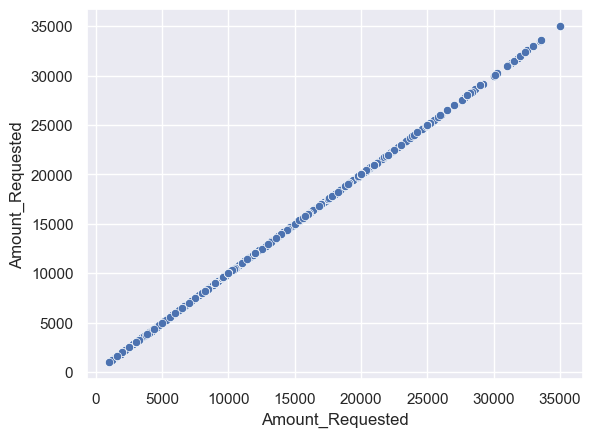

In [66]:
sns.scatterplot(x=data.Amount_Requested,y=data.Amount_Requested)

plt.show()

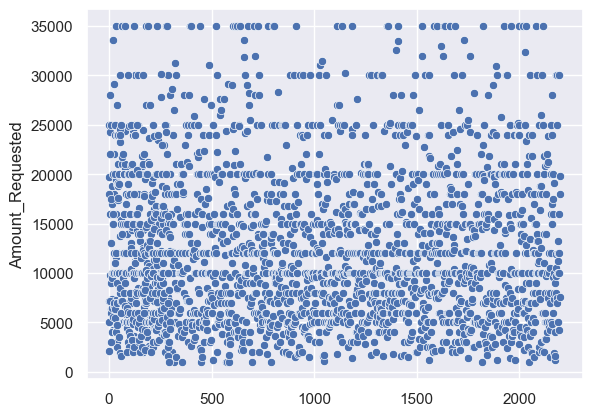

In [67]:
sns.scatterplot(x=data.Amount_Requested.index,y=data.Amount_Requested)

plt.show()

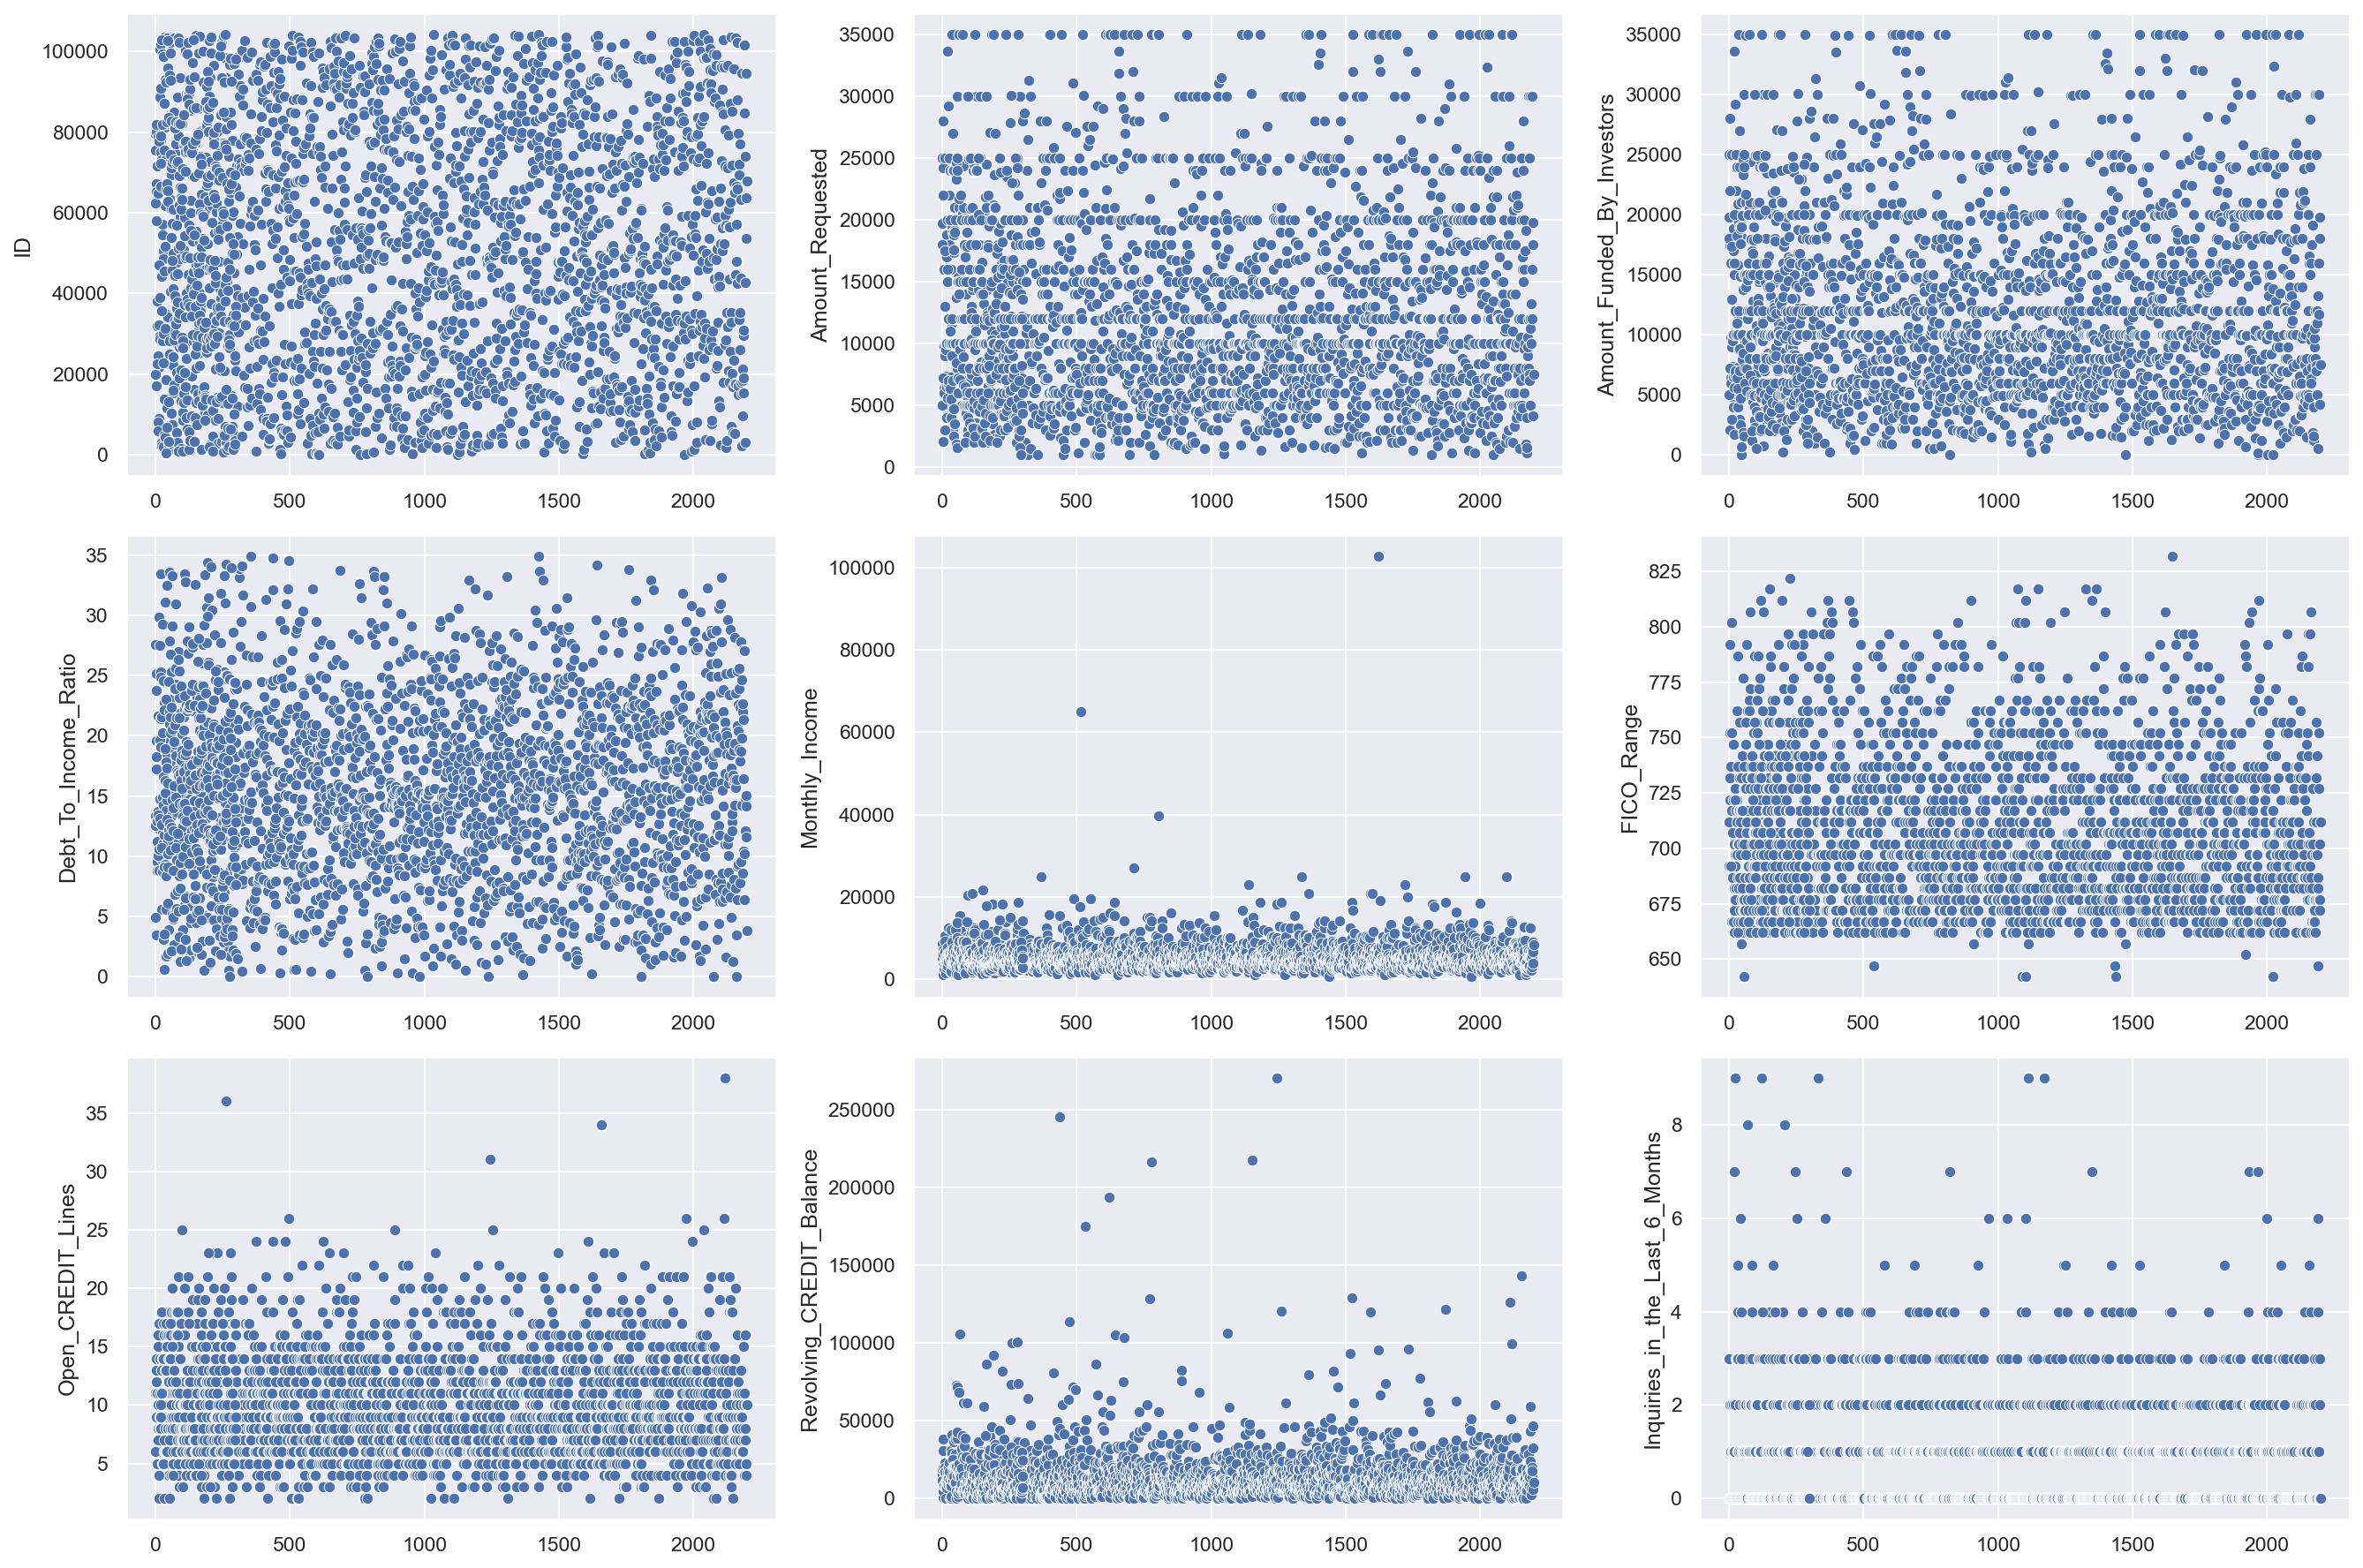

In [68]:
f,a= plt.subplots(3,3, figsize=(18,12),dpi=150)
ind=0

for i in range(3):
    for j in range(3):
        sns.scatterplot(y=data[num_cols[ind]], x= data[num_cols[ind]].index, ax=a[i,j])
        ind+=1
plt.tight_layout()
plt.show()

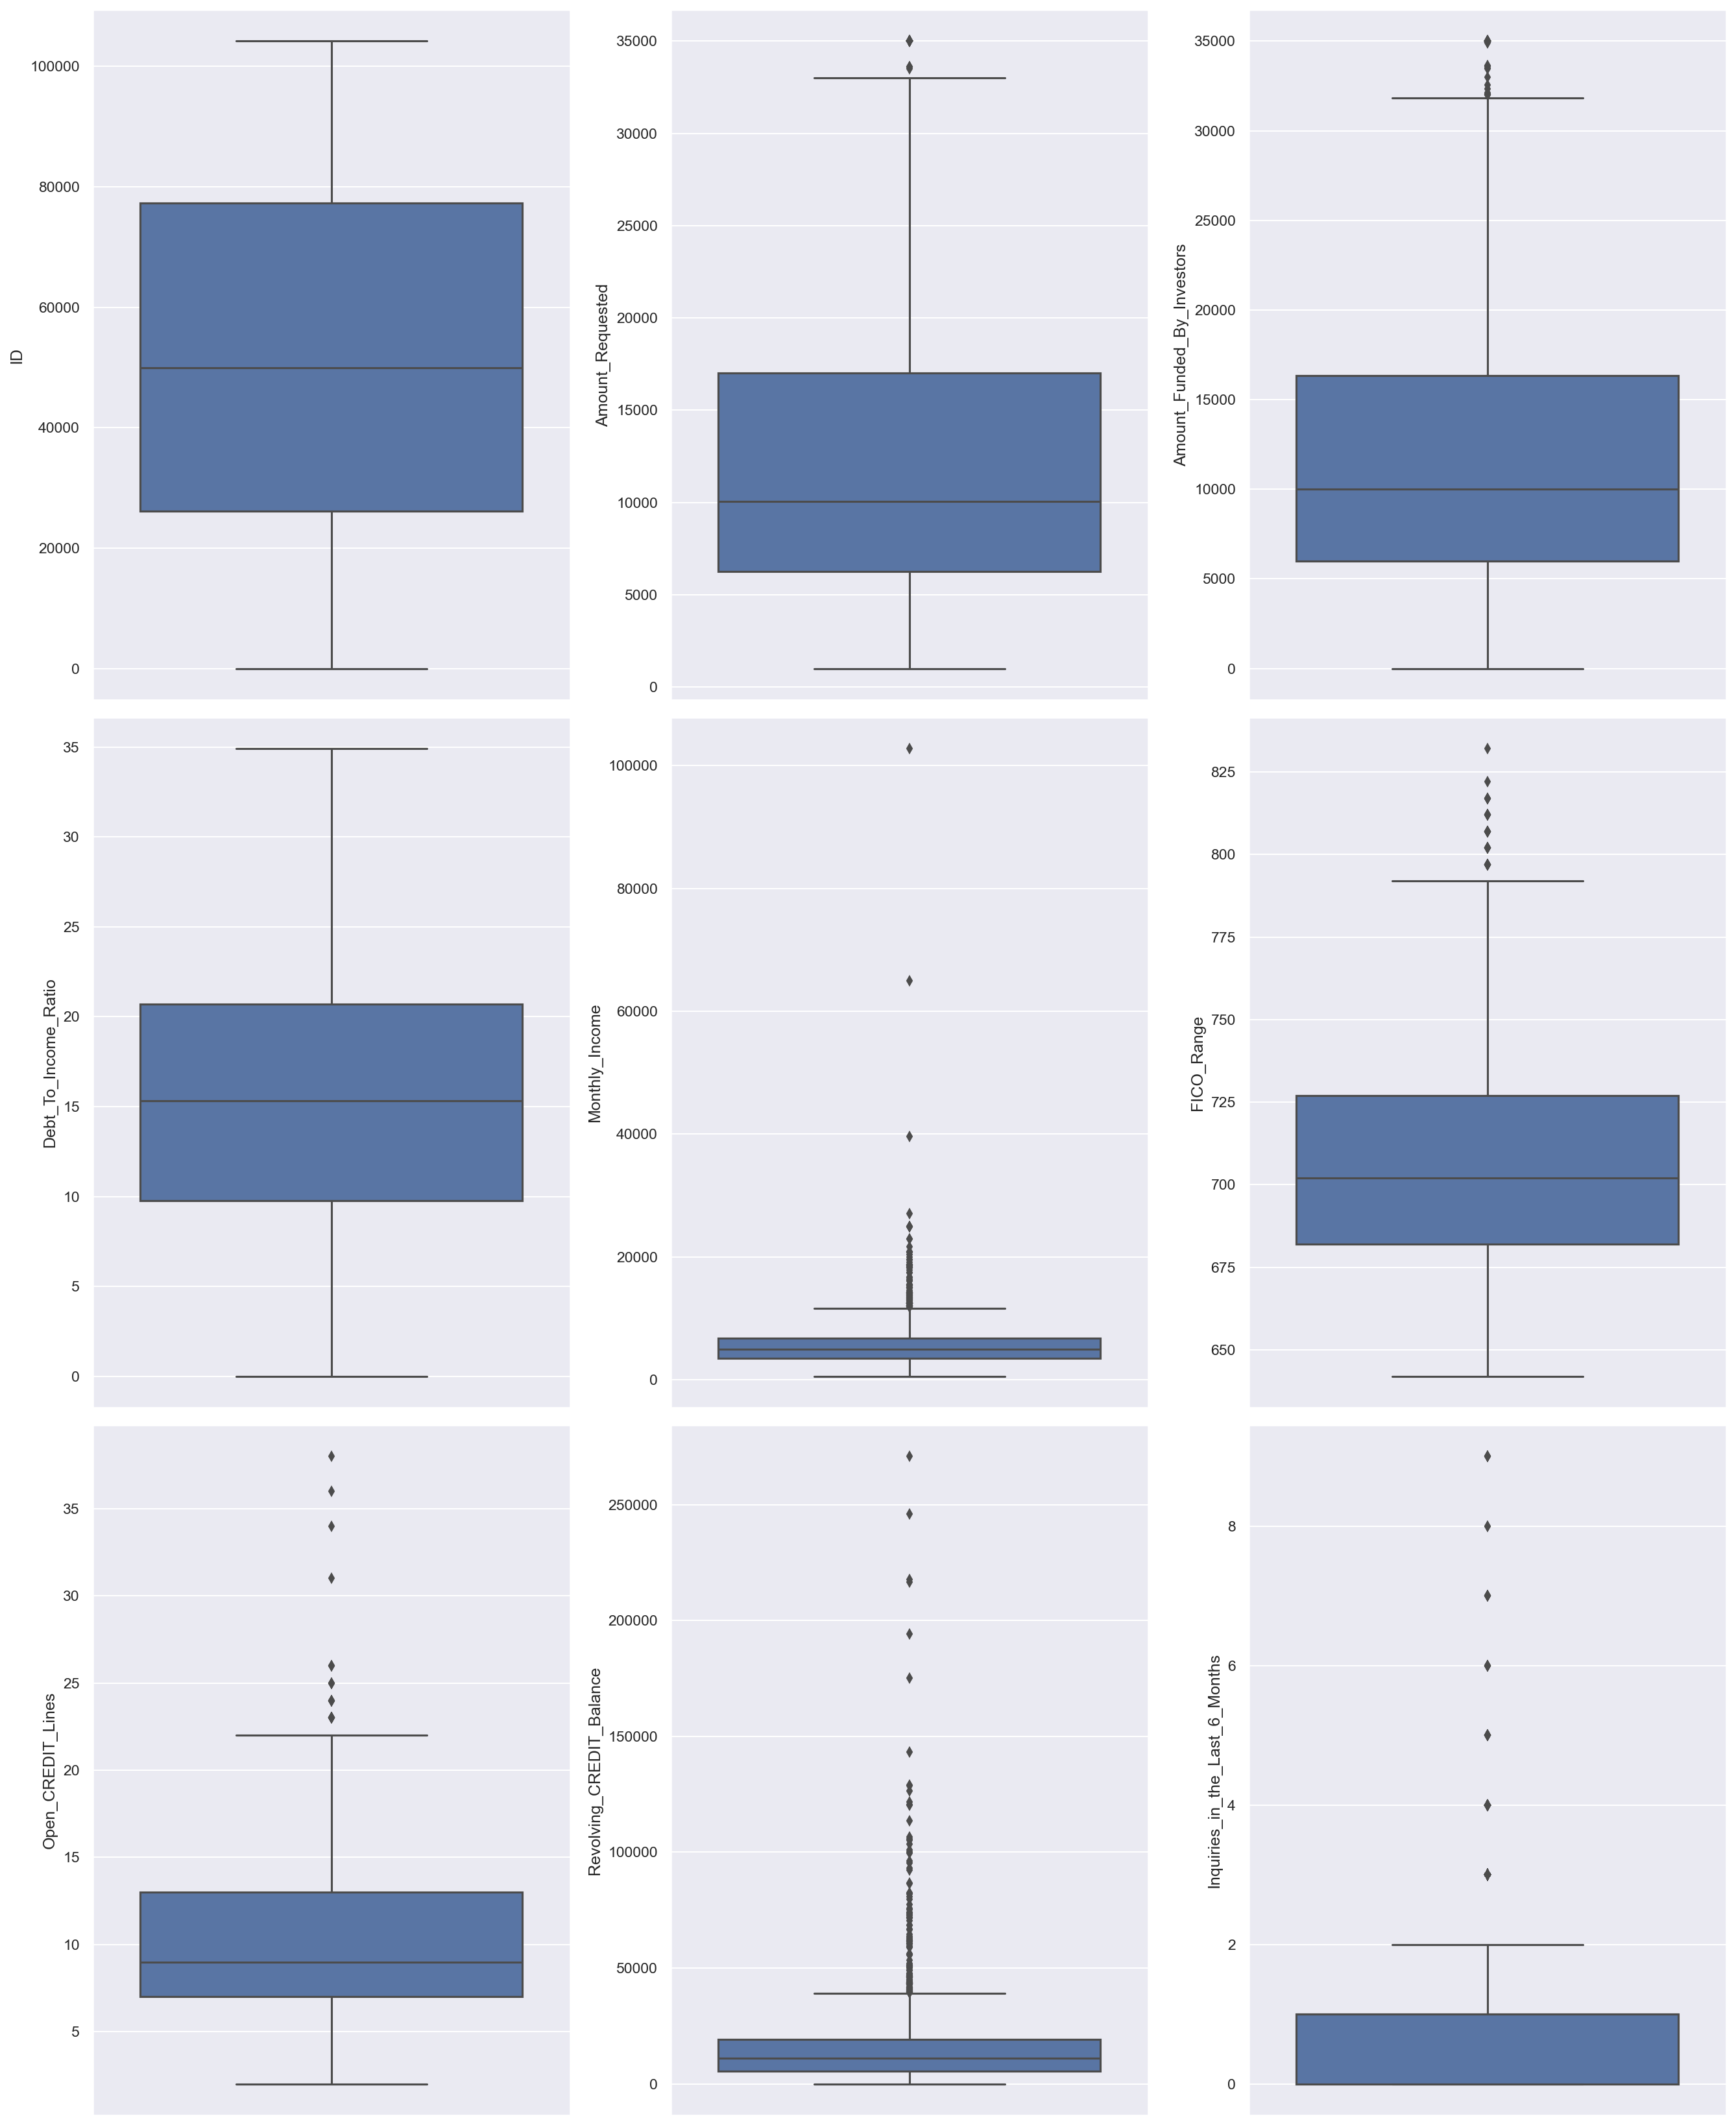

In [69]:
f,a = plt.subplots(3,3,figsize=(18,22), dpi=150)
ind=0

for i in range(3):
    for j in range(3):
        sns.boxplot(y= data[num_cols[ind]], ax=a[i,j])
        ind +=1
plt.tight_layout()
plt.show()

In [70]:
# Capping Method
def out_cap(col):
    q3 = data[col].quantile(0.75)
    q1 = data[col].quantile(0.25)
    
    iqr = q3 - q1
    
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    
    data[col].clip(lower,upper,inplace=True)

In [71]:
for i in num_cols:
    out_cap(i)

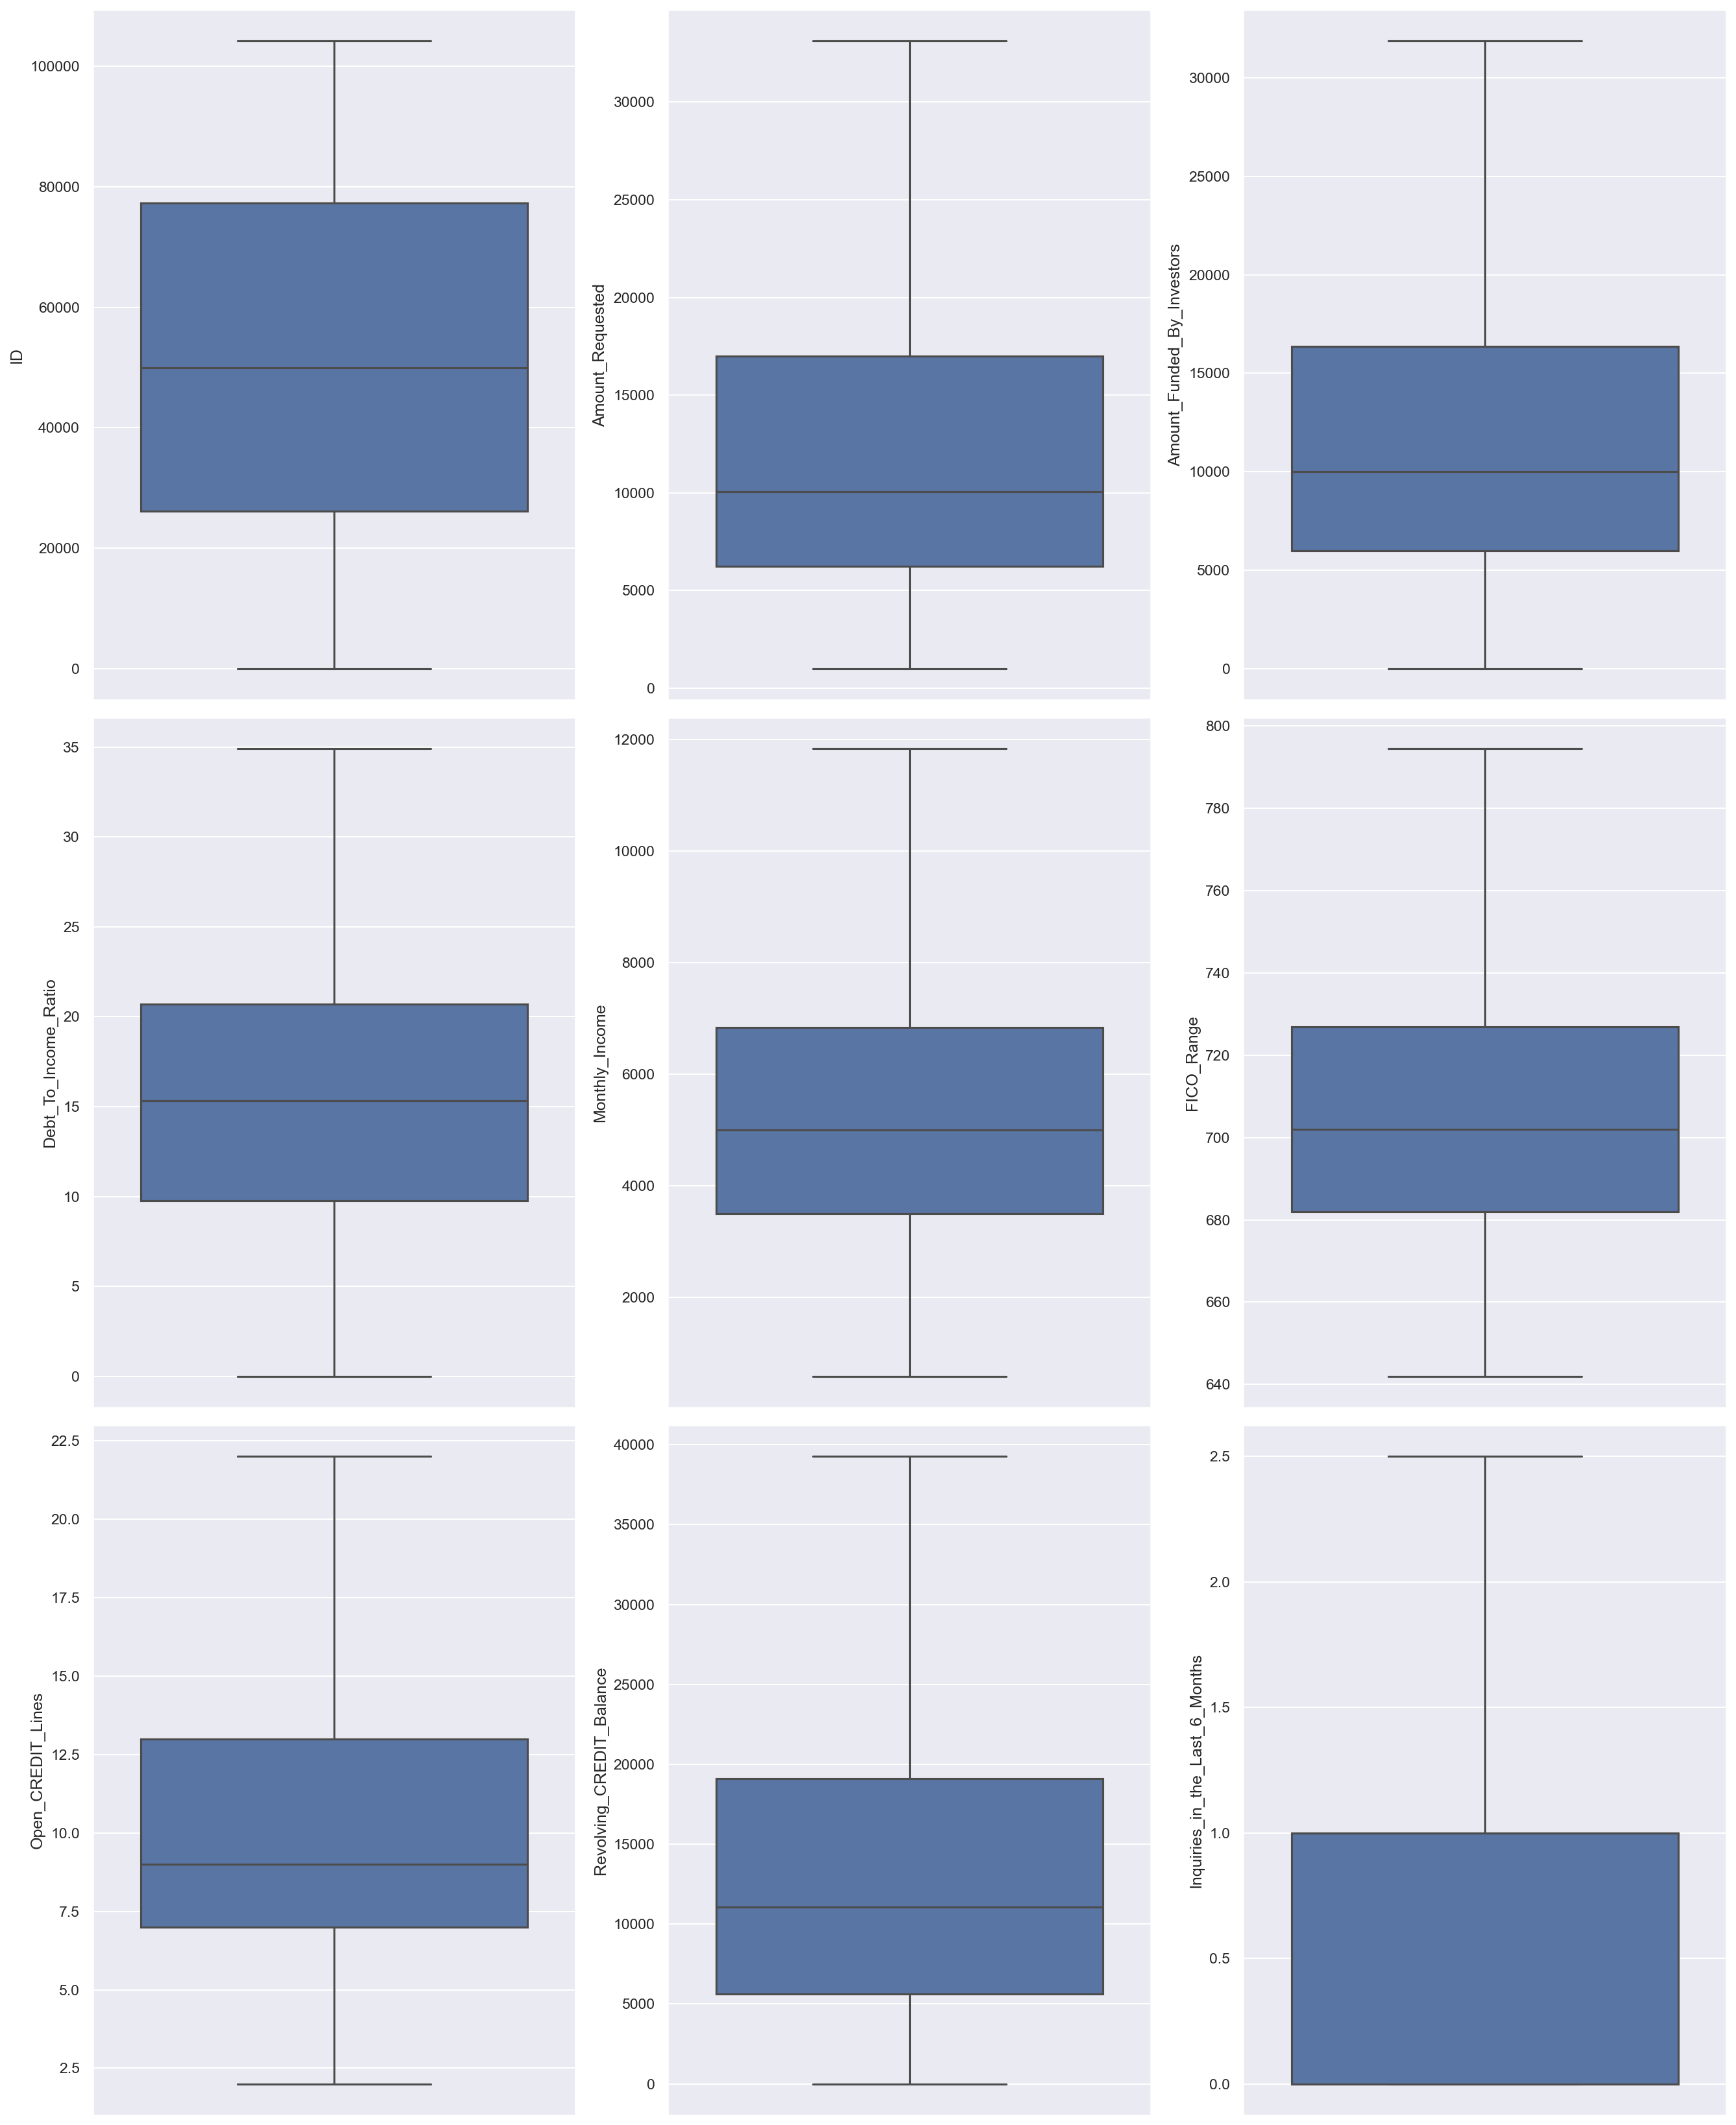

In [72]:
f,a = plt.subplots(3,3,figsize=(18,22), dpi=150)
ind=0

for i in range(3):
    for j in range(3):
        sns.boxplot(y= data[num_cols[ind]], ax=a[i,j])
        ind +=1
plt.tight_layout()
plt.show()

# Categorical columns

In [73]:
for i in data:
    if i not in num_cols:
        print(i)

Interest_Rate
Loan_Length
Loan_Purpose
State
Home_Ownership


In [74]:
# first drop the unwanted columns
data.drop(['State'],axis=1,inplace=True)

In [75]:
# categorical columns
cat_cols =[]
for i in data:
    if i not in num_cols and i != 'Interest_Rate':
        cat_cols.append(i)

In [76]:
cat_cols

['Loan_Length', 'Loan_Purpose', 'Home_Ownership']

In [77]:
data.Loan_Length.value_counts()

36.0    1858
60.0     533
Name: Loan_Length, dtype: int64

In [78]:
data.Loan_Purpose.value_counts()

debt_consolidation    1260
credit_card            426
other                  181
home_improvement       143
major_purchase          98
small_business          82
car                     49
wedding                 38
moving                  28
medical                 28
house                   20
vacation                20
educational             14
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [79]:
data.Loan_Purpose.replace(dict.fromkeys(data.Loan_Purpose.value_counts()[3:].index, 'major_purchase'),inplace=True)
data.Loan_Purpose.value_counts()

debt_consolidation    1260
major_purchase         524
credit_card            426
other                  181
Name: Loan_Purpose, dtype: int64

In [80]:
data = pd.get_dummies(data, columns = ['Loan_Purpose'],dtype=int)

In [81]:
data.Home_Ownership.value_counts()

RENT        1104
MORTGAGE    1096
OWN          186
OTHER          5
Name: Home_Ownership, dtype: int64

In [82]:
data.Home_Ownership.replace({'OTHER':'OWN'},inplace=True)
data.Home_Ownership.value_counts()

RENT        1104
MORTGAGE    1096
OWN          191
Name: Home_Ownership, dtype: int64

In [83]:
data.Home_Ownership = data.Home_Ownership.replace({'OWN':3, 'MORTGAGE':2,'RENT':1})

In [84]:
data.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_other
0,79542.0,25000.0,25000.00,18.49,60.0,27.56,2,8606.56,722.0,11.0,15210.0,2.5,5.0,0,1,0,0
1,75473.0,19750.0,19750.00,17.27,60.0,13.39,2,6737.50,712.0,14.0,19070.0,2.5,4.0,0,1,0,0
2,67265.0,2100.0,2100.00,14.33,36.0,3.50,3,1000.00,692.0,13.0,893.0,1.0,0.5,0,0,1,0
3,80167.0,28000.0,28000.00,16.29,36.0,19.62,2,7083.33,712.0,12.0,38194.0,1.0,10.0,1,0,0,0
4,17240.0,24250.0,17431.82,12.23,60.0,23.79,2,5833.33,732.0,6.0,31061.0,2.0,10.0,1,0,0,0


In [85]:
data.dtypes

ID                                 float64
Amount_Requested                   float64
Amount_Funded_By_Investors         float64
Interest_Rate                       object
Loan_Length                        float64
Debt_To_Income_Ratio               float64
Home_Ownership                       int64
Monthly_Income                     float64
FICO_Range                         float64
Open_CREDIT_Lines                  float64
Revolving_CREDIT_Balance           float64
Inquiries_in_the_Last_6_Months     float64
Employment_Length                  float64
Loan_Purpose_credit_card             int32
Loan_Purpose_debt_consolidation      int32
Loan_Purpose_major_purchase          int32
Loan_Purpose_other                   int32
dtype: object

# Let's split the train and test data

In [86]:
data.Interest_Rate.value_counts()

testdata    288
12.12       110
7.90        102
13.11       102
15.31        61
           ... 
17.54         1
18.29         1
19.47         1
14.79         1
19.41         1
Name: Interest_Rate, Length: 261, dtype: int64

In [87]:
test = data[data.Interest_Rate=='testdata']
test

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_other
0,20093.0,5000.0,5000.0,testdata,60.0,12.59,1,4416.67,692.0,13.0,7686.0,0.0,0.5,0,0,1,0
1,62445.0,18000.0,18000.0,testdata,60.0,4.93,1,5258.50,712.0,6.0,11596.0,0.0,10.0,0,1,0,0
2,65248.0,7200.0,7200.0,testdata,60.0,25.16,2,3750.00,752.0,13.0,7283.0,0.0,6.0,0,1,0,0
3,81822.0,7200.0,7200.0,testdata,36.0,17.27,2,3416.67,792.0,14.0,4838.0,0.0,10.0,0,1,0,0
4,57923.0,22000.0,22000.0,testdata,60.0,18.28,2,6083.33,722.0,9.0,20181.0,0.0,8.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,24675.0,12000.0,11975.0,testdata,60.0,13.91,2,7083.33,707.0,7.0,3923.0,2.0,7.0,0,0,1,0
296,69456.0,5000.0,5000.0,testdata,36.0,17.22,3,4000.00,707.0,10.0,6023.0,0.0,10.0,0,1,0,0
297,97954.0,4375.0,4375.0,testdata,36.0,9.09,1,2916.67,672.0,9.0,6944.0,2.0,6.0,1,0,0,0
298,36931.0,13600.0,13600.0,testdata,60.0,12.85,1,5651.33,677.0,13.0,24383.0,0.0,10.0,1,0,0,0


In [88]:
test = test.drop('Interest_Rate', axis=1)

In [89]:
test.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_other
0,20093.0,5000.0,5000.0,60.0,12.59,1,4416.67,692.0,13.0,7686.0,0.0,0.5,0,0,1,0
1,62445.0,18000.0,18000.0,60.0,4.93,1,5258.50,712.0,6.0,11596.0,0.0,10.0,0,1,0,0
2,65248.0,7200.0,7200.0,60.0,25.16,2,3750.00,752.0,13.0,7283.0,0.0,6.0,0,1,0,0
3,81822.0,7200.0,7200.0,36.0,17.27,2,3416.67,792.0,14.0,4838.0,0.0,10.0,0,1,0,0
4,57923.0,22000.0,22000.0,60.0,18.28,2,6083.33,722.0,9.0,20181.0,0.0,8.0,0,1,0,0


In [90]:
test.shape

(288, 16)

In [91]:
train=data[data.Interest_Rate!='testdata']

In [92]:
train.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_other
0,79542.0,25000.0,25000.00,18.49,60.0,27.56,2,8606.56,722.0,11.0,15210.0,2.5,5.0,0,1,0,0
1,75473.0,19750.0,19750.00,17.27,60.0,13.39,2,6737.50,712.0,14.0,19070.0,2.5,4.0,0,1,0,0
2,67265.0,2100.0,2100.00,14.33,36.0,3.50,3,1000.00,692.0,13.0,893.0,1.0,0.5,0,0,1,0
3,80167.0,28000.0,28000.00,16.29,36.0,19.62,2,7083.33,712.0,12.0,38194.0,1.0,10.0,1,0,0,0
4,17240.0,24250.0,17431.82,12.23,60.0,23.79,2,5833.33,732.0,6.0,31061.0,2.0,10.0,1,0,0,0


In [93]:
train.shape

(2103, 17)

In [94]:
train.dtypes

ID                                 float64
Amount_Requested                   float64
Amount_Funded_By_Investors         float64
Interest_Rate                       object
Loan_Length                        float64
Debt_To_Income_Ratio               float64
Home_Ownership                       int64
Monthly_Income                     float64
FICO_Range                         float64
Open_CREDIT_Lines                  float64
Revolving_CREDIT_Balance           float64
Inquiries_in_the_Last_6_Months     float64
Employment_Length                  float64
Loan_Purpose_credit_card             int32
Loan_Purpose_debt_consolidation      int32
Loan_Purpose_major_purchase          int32
Loan_Purpose_other                   int32
dtype: object

In [95]:
train.Interest_Rate = train.Interest_Rate.astype(float)

# Let's split the training data into features and target

In [96]:
features = train.drop('Interest_Rate', axis=1)

In [97]:
features.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_other
0,79542.0,25000.0,25000.00,60.0,27.56,2,8606.56,722.0,11.0,15210.0,2.5,5.0,0,1,0,0
1,75473.0,19750.0,19750.00,60.0,13.39,2,6737.50,712.0,14.0,19070.0,2.5,4.0,0,1,0,0
2,67265.0,2100.0,2100.00,36.0,3.50,3,1000.00,692.0,13.0,893.0,1.0,0.5,0,0,1,0
3,80167.0,28000.0,28000.00,36.0,19.62,2,7083.33,712.0,12.0,38194.0,1.0,10.0,1,0,0,0
4,17240.0,24250.0,17431.82,60.0,23.79,2,5833.33,732.0,6.0,31061.0,2.0,10.0,1,0,0,0


In [98]:
target = train[['Interest_Rate']]

In [99]:
target

,Interest_Rate
0,18.49
1,17.27
2,14.33
3,16.29
4,12.23
...,...
2195,23.28
2196,14.33
2197,15.31
2198,20.99


In [100]:
features.shape

(2103, 16)

In [101]:
target.shape

(2103, 1)

# Let's have the training and validation data

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(features, target, test_size=0.2, random_state=40)

In [103]:
x_train.shape

(1682, 16)

In [104]:
x_val.shape

(421, 16)

In [105]:
y_train.shape

(1682, 1)

In [106]:
y_val.shape

(421, 1)

# Model Building

In [109]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [110]:
lr.fit(x_train, y_train)

LinearRegression()

In [111]:
# model learning is done

# Prediction on the training data

In [112]:
lr.predict(x_train)

array([[15.55990688],
       [11.8658609 ],
       [17.65381559],
       ...,
       [11.04886295],
       [11.22410903],
       [14.88467384]])

# Score on the trainig data

In [113]:
lr.score(x_train,y_train)

0.7831119075370759

# Prediction on the validation data

In [114]:
lr.predict(x_val)

array([[12.25602444],
       [15.44814317],
       [16.61422004],
       [13.64195965],
       [10.35545546],
       [21.81356627],
       [19.06300449],
       [13.02397625],
       [ 7.57253549],
       [20.03101756],
       [10.46633658],
       [ 6.03223629],
       [14.45040455],
       [ 6.54004725],
       [10.21521149],
       [ 6.96911718],
       [14.06572381],
       [11.77785932],
       [19.30125383],
       [14.67158184],
       [ 8.98253726],
       [12.9902613 ],
       [13.22540371],
       [12.22145541],
       [15.74635984],
       [ 8.14548334],
       [14.49440317],
       [10.2361778 ],
       [12.96627842],
       [ 6.38144995],
       [15.65601112],
       [16.87638711],
       [ 9.63255202],
       [11.00687659],
       [21.22247012],
       [11.63909166],
       [ 7.42351221],
       [10.66900881],
       [14.67485085],
       [12.13037596],
       [ 8.16146602],
       [12.57295094],
       [15.89716263],
       [14.71456885],
       [ 7.35800982],
       [11

# Score on the validation data

In [115]:
lr.score(x_val, y_val)

0.7424081626920208

In [117]:
lr.predict(test)

array([[15.35757551],
       [15.7951311 ],
       [10.01212127],
       [ 3.37825904],
       [15.28298271],
       [15.77359922],
       [10.26320731],
       [14.87009404],
       [12.11987155],
       [10.20716951],
       [11.58614829],
       [13.78457182],
       [13.70135725],
       [18.50878487],
       [10.64610989],
       [15.96644014],
       [14.21594763],
       [14.2728707 ],
       [22.31342877],
       [18.01803187],
       [10.61299471],
       [15.33720707],
       [ 9.37732168],
       [10.36469456],
       [19.74929308],
       [12.46684325],
       [17.1769497 ],
       [15.4596214 ],
       [15.52942998],
       [12.81566953],
       [15.04489867],
       [14.04803527],
       [14.51921655],
       [19.2286005 ],
       [10.54706662],
       [11.70597074],
       [16.39201117],
       [14.46503275],
       [10.98806253],
       [13.28194653],
       [16.12055498],
       [17.35885955],
       [15.10574478],
       [16.47762903],
       [17.01583315],
       [10